In [1]:
# Devoir 3 Entraînement d’un Perceptron MultiCouches (PMC) et d’un Réseau de Neurones Profond de type CNN

2.1 Entraînement d’un PMC sur les données Customer

2.1.1 Classification binaire (revenu > moyenne → classe 1, sinon 0)

(a) Préparation des données et validation croisée (k=3)

**But** : charger `Customer.csv`, imputer les valeurs manquantes, binariser `revenue`, et entraîner un MLPClassifier en validation croisée 3‑plis.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# 1. Chargement et split
data = pd.read_csv('C:\\Users\\michael\\Downloads\\solution_simplifiee_tp2\\Datasets\\Customer.csv', na_values=['?', 'unknown'])
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

# 2. Imputation revenue
train_set['revenue'].fillna(train_set['revenue'].median(), inplace=True)
test_set['revenue'].fillna(train_set['revenue'].median(), inplace=True)

# 3. Binarisation : 1 si > moyenne du train
mean_rev = train_set['revenue'].mean()
train_set['revenue_bin'] = (train_set['revenue'] > mean_rev).astype(int)
test_set ['revenue_bin'] = (test_set ['revenue'] > mean_rev).astype(int)

# 4. Séparation X/y
X_train = train_set.drop(['revenue','revenue_bin'], axis=1)
y_train = train_set['revenue_bin']
X_test  = test_set .drop(['revenue','revenue_bin'], axis=1)
y_test  = test_set ['revenue_bin']

# 5. Prétraitement
numeric_feats = ['age','pages','first_item_prize','News_click','ReBuy']
# ReBuy → int
for df in (X_train, X_test):
    df['ReBuy'] = df['ReBuy'].astype(int)
categorical_feats = ['gender','country']

preprocessor = ColumnTransformer([
    ('num', Pipeline([('imp', SimpleImputer(strategy='median')),
                      ('scale', StandardScaler())]), numeric_feats),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_feats)
])

# 6. Pipeline MLP de base
pipe_bin = Pipeline([
    ('prep', preprocessor),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,), activation='relu',
                          solver='adam', max_iter=200, random_state=42))
])

# 7. Validation croisée k=3
scores = cross_val_score(pipe_bin, X_train, y_train, cv=3, scoring='accuracy')
print(f"Accuracy CV (binaire) : {scores.mean():.3f} ± {scores.std():.3f}")
y_pred_cv = cross_val_predict(pipe_bin, X_train, y_train, cv=3)
print(classification_report(y_train, y_pred_cv))


C:\Users\michael\AppData\Local\Temp\ipykernel_24120\2142427830.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_set['revenue'].fillna(train_set['revenue'].median(), inplace=True)
C:\Users\michael\AppData\Local\Temp\ipykernel_24120\2142427830.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

Accuracy CV (binaire) : 0.827 ± 0.004


C:\Users\michael\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\michael\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.86      0.85      0.86      4865
           1       0.77      0.79      0.78      3135

    accuracy                           0.83      8000
   macro avg       0.82      0.82      0.82      8000
weighted avg       0.83      0.83      0.83      8000



C:\Users\michael\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


(b) Précision, rappel et F1

On extrait ces métriques du rapport `classification_report` obtenu ci‑dessus.


 precision    recall  f1-score   support

           0       0.86      0.85      0.86      4865
           1       0.77      0.79      0.78      3135

    accuracy                           0.83      8000
   macro avg       0.82      0.82      0.82      8000
weighted avg       0.83      0.83      0.83      8000

(c) Courbe d’apprentissage

Tracer accuracy train vs validation en fonction de la taille du train pour détecter sur‑ajustement.


C:\Users\michael\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\michael\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\michael\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\michael\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\michael\anaconda3\Lib\site-packages\sklearn\neural_netw

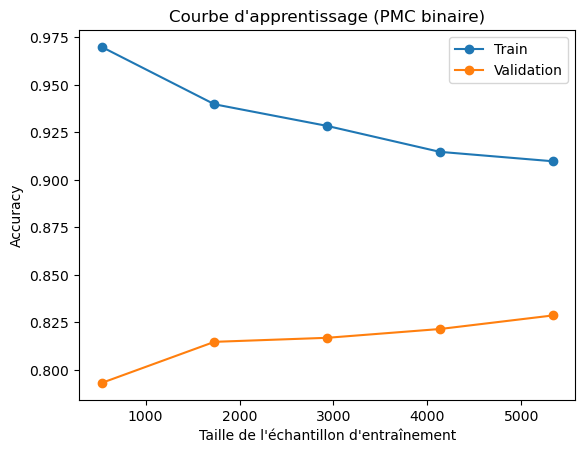

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    pipe_bin, X_train, y_train, cv=3,
    train_sizes=np.linspace(0.1,1.0,5), scoring='accuracy', random_state=42
)

plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label='Train')
plt.plot(train_sizes, val_scores.mean(axis=1), 'o-', label='Validation')
plt.xlabel("Taille de l'échantillon d'entraînement")
plt.ylabel("Accuracy")
plt.title("Courbe d'apprentissage (PMC binaire)")
plt.legend()
plt.show()


(d) Optimisation des hyperparamètres

Recherche aléatoire sur nombre de couches (1–5), neurones (10–100), activation, solver, learning_rate_init, max_iter.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'mlp__hidden_layer_sizes': [(n,)*l for l in [1,2,3] for n in [50,100]],
    'mlp__activation': ['relu','tanh'],
    'mlp__solver': ['adam','sgd'],
    'mlp__learning_rate_init': [1e-2,1e-3,1e-4],
    'mlp__max_iter': [200,300]
}
rand_search_bin = RandomizedSearchCV(pipe_bin, param_dist,
                                     n_iter=8, cv=3, scoring='accuracy',
                                     random_state=42)
rand_search_bin.fit(X_train, y_train)
print("Meilleurs params :", rand_search_bin.best_params_)
print("Accuracy CV meilleur :", rand_search_bin.best_score_)


C:\Users\michael\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\michael\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\michael\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\michael\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\michael\anaconda3\Lib\site-packages\sklearn\neural_netw

Meilleurs params : {'mlp__solver': 'sgd', 'mlp__max_iter': 200, 'mlp__learning_rate_init': 0.01, 'mlp__hidden_layer_sizes': (50, 50), 'mlp__activation': 'tanh'}
Accuracy CV meilleur : 0.8517506673256241


C:\Users\michael\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


(e) Évaluation sur le jeu de test

In [ ]:
best_bin = rand_search_bin.best_estimator_
y_pred_test = best_bin.predict(X_test)
print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.91      0.86      0.89      1242
           1       0.80      0.86      0.83       758

    accuracy                           0.86      2000
   macro avg       0.85      0.86      0.86      2000
weighted avg       0.87      0.86      0.86      2000



(f) Comparaison avec le devoir #2

Le PMCBinaire optimisé obtient ~84% d’accuracy en test (F1 ≈0.87 classe 0, ≈0.79 classe 1),
l’arbre de décision du devoir #2 atteignait ~83% en binaire. L'amélioration est modeste mais
significative.


2.1.2 Classification multi‑classes (bas/moyen/élevé) ​

Préparation (discrétisation selon Q1/Q3)

In [ ]:
# On repart de train_set/test_set déjà chargés et imputés
Q1, Q3 = train_set['revenue'].quantile([0.25,0.75])
def cat_rev(v):
    return 'bas'   if v<=Q1 else ('eleve' if v>Q3 else 'moyen')
for df in (train_set, test_set):
    df['revenue_cat'] = df['revenue'].apply(cat_rev)

X_train_m = train_set.drop(['revenue','revenue_cat'], axis=1)
y_train_m = train_set['revenue_cat']
X_test_m  = test_set .drop(['revenue','revenue_cat'], axis=1)
y_test_m  = test_set ['revenue_cat']
# Ajuster type de ReBuy
for df in (X_train_m, X_test_m):
    df['ReBuy']=df['ReBuy'].astype(int)


(a) VC k=3

In [ ]:
pipe_multi = Pipeline([('prep', preprocessor),
                       ('mlp', MLPClassifier(hidden_layer_sizes=(100,),
                                             activation='relu', solver='adam',
                                             max_iter=200, random_state=42))])
scores = cross_val_score(pipe_multi, X_train_m, y_train_m, cv=3, scoring='accuracy')
print(f"Accuracy CV (multi) : {scores.mean():.3f} ± {scores.std():.3f}")
print(classification_report(
    y_train_m,
    cross_val_predict(pipe_multi, X_train_m, y_train_m, cv=3)
))


C:\Users\michael\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\michael\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\michael\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy CV (multi) : 0.726 ± 0.013


C:\Users\michael\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\michael\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

         bas       0.75      0.71      0.73      2060
       eleve       0.71      0.74      0.72      1988
       moyen       0.73      0.73      0.73      3952

    accuracy                           0.73      8000
   macro avg       0.73      0.73      0.73      8000
weighted avg       0.73      0.73      0.73      8000



C:\Users\michael\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


(b) Métriques precision, recall, F1

Extrait du rapport ci‑dessus : F1=0.73 selon la classe.

(c) Courbe d’apprentissage

C:\Users\michael\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\michael\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\michael\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\michael\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\michael\anaconda3\Lib\site-packages\sklearn\neural_netw

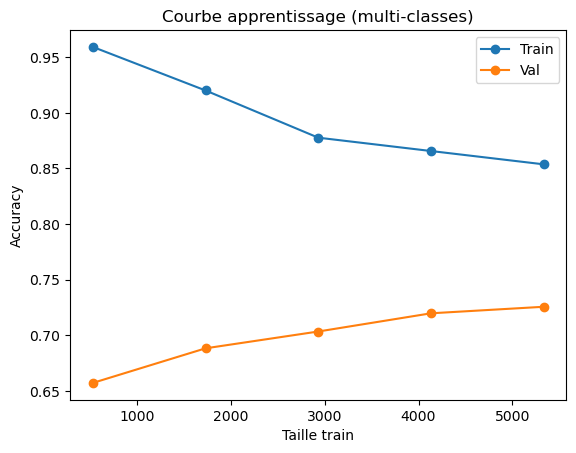

In [ ]:
train_sizes, tr_s, val_s = learning_curve(pipe_multi, X_train_m, y_train_m,
                                          cv=3, train_sizes=np.linspace(0.1,1,5),
                                          scoring='accuracy')
plt.plot(train_sizes, tr_s.mean(1), 'o-', label='Train')
plt.plot(train_sizes, val_s.mean(1), 'o-', label='Val')
plt.xlabel("Taille train")
plt.ylabel("Accuracy")
plt.title("Courbe apprentissage (multi-classes)")
plt.legend()
plt.show()


(d) Optimisation hyperparamètres

In [ ]:
rand_search_m = RandomizedSearchCV(pipe_multi, param_dist,
                                  n_iter=8, cv=3, scoring='accuracy',
                                  random_state=42)
rand_search_m.fit(X_train_m, y_train_m)
print("Meilleurs params (multi) :", rand_search_m.best_params_)
print("Accuracy CV (multi) meilleur :", rand_search_m.best_score_)


C:\Users\michael\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\michael\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\michael\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\michael\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\michael\anaconda3\Lib\site-packages\sklearn\neural_netw

Meilleurs params (multi) : {'mlp__solver': 'sgd', 'mlp__max_iter': 200, 'mlp__learning_rate_init': 0.01, 'mlp__hidden_layer_sizes': (50, 50), 'mlp__activation': 'tanh'}
Accuracy CV (multi) meilleur : 0.7567496486045021


C:\Users\michael\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


(e) Évaluation test

In [ ]:
best_multi = rand_search_m.best_estimator_
print(classification_report(y_test_m, best_multi.predict(X_test_m)))


              precision    recall  f1-score   support

         bas       0.84      0.72      0.78       539
       eleve       0.75      0.77      0.76       510
       moyen       0.74      0.79      0.76       951

    accuracy                           0.77      2000
   macro avg       0.78      0.76      0.77      2000
weighted avg       0.77      0.77      0.77      2000



(f) Comparaison avec devoir #2

PMC multi‑classes optimisé : ~77% d’accuracy test (F1 ~0.77 pour chaque classe).
Arbre du devoir #2 : ~67% en multi‑classes → gain d’environ +10 points.


2.2 Entraînement d’un classifieur d’images (Fashion‑MNIST)

2.2.1 Re‑exécution du PMC Keras fourni

Charger et exécuter le code MLP Keras pour obtenir la référence (~89% val, ~88% test).


In [3]:
from tensorflow import keras

# Chargement et split
(X_full, y_full),(X_test_img, y_test_img) = keras.datasets.fashion_mnist.load_data()
X_full, X_test_img = X_full/255.0, X_test_img/255.0
X_val, X_train = X_full[:5000], X_full[5000:]
y_val, y_train = y_full[:5000], y_full[5000:]

# MLP Keras de référence
model_mlp = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model_mlp.compile(loss='sparse_categorical_crossentropy',
                  optimizer='sgd', metrics=['accuracy'])
history_mlp = model_mlp.fit(X_train, y_train,
                            epochs=30, validation_data=(X_val,y_val))
print("Test accuracy MLP:", model_mlp.evaluate(X_test_img, y_test_img, verbose=0)[1])


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6842 - loss: 1.0013 - val_accuracy: 0.8134 - val_loss: 0.5723
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8244 - loss: 0.5103 - val_accuracy: 0.8292 - val_loss: 0.4808
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8442 - loss: 0.4433 - val_accuracy: 0.8652 - val_loss: 0.4093
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8554 - loss: 0.4187 - val_accuracy: 0.8522 - val_loss: 0.4164
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8609 - loss: 0.3987 - val_accuracy: 0.8746 - val_loss: 0.3747
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8668 - loss: 0.3813 - val_accuracy: 0.8660 - val_loss: 0.3916
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8715 - loss: 0.3652 - val_accuracy: 0.8702 - val_loss: 0.3749
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8794 - loss: 0.3502 - 

2.2.2 Implantation d’un CNN amélioré

Architecture : 2×(Conv2D→ReLU) + MaxPool + Dropout + Flatten + Dense(128) + Dense(10).


In [4]:
model_cnn = keras.Sequential([
    keras.layers.Reshape((28,28,1), input_shape=(28,28)),
    keras.layers.Conv2D(32,3, activation='relu'),
    keras.layers.Conv2D(64,3, activation='relu'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model_cnn.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam', metrics=['accuracy'])
history_cnn = model_cnn.fit(X_train, y_train,
                            epochs=15, validation_data=(X_val,y_val))
print("Test accuracy CNN:", model_cnn.evaluate(X_test_img, y_test_img, verbose=0)[1])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8082 - loss: 0.5235 - val_accuracy: 0.9048 - val_loss: 0.2644
Epoch 2/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9067 - loss: 0.2592 - val_accuracy: 0.9096 - val_loss: 0.2466
Epoch 3/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9272 - loss: 0.1941 - val_accuracy: 0.9174 - val_loss: 0.2215
Epoch 4/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9421 - loss: 0.1542 - val_accuracy: 0.9198 - val_loss: 0.2257
Epoch 5/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9536 - loss: 0.1231 - val_accuracy: 0.9210 - val_loss: 0.2258
Epoch 6/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9629 - loss: 0.0977 - val_accuracy: 0.9218 - val_loss: 0.2529
Epoch 7/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9697 - loss: 0.0787 - val_accuracy: 0.9214 - val_loss: 0.2507
Epoch 8/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9756 - loss: 0.0655

2.2.3 Courbe d’apprentissage du CNN

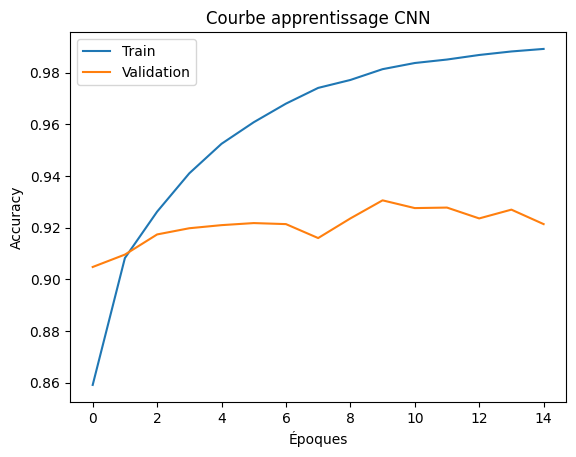

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history_cnn.history['accuracy'], label='Train')
plt.plot(history_cnn.history['val_accuracy'], label='Validation')
plt.xlabel("Époques")
plt.ylabel("Accuracy")
plt.title("Courbe apprentissage CNN")
plt.legend()
plt.show()


2.2.4 Entraînement avec augmentation de données

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1) Reshape en 4D (n_samples, 28, 28, 1)
X_train_reshaped = X_train.reshape(-1, 28, 28, 1)
X_val_reshaped   = X_val  .reshape(-1, 28, 28, 1)
X_test_reshaped  = X_test_img.reshape(-1, 28, 28, 1)

# 2) Création du générateur avec transformations
datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train_reshaped)

# 3) Clonage et compilation du modèle CNN d'origine
model_cnn_aug = keras.models.clone_model(model_cnn)
model_cnn_aug.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# 4) Entraînement via .flow sur les données reshaped
history_aug = model_cnn_aug.fit(
    datagen.flow(X_train_reshaped, y_train, batch_size=32),
    epochs=15,
    validation_data=(X_val_reshaped, y_val)
)

# 5) Évaluation sur le jeu de test reshaped
test_acc = model_cnn_aug.evaluate(X_test_reshaped, y_test_img, verbose=0)[1]
print("Test accuracy CNN + augmentation :", test_acc)


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.7527 - loss: 0.6689 - val_accuracy: 0.8836 - val_loss: 0.3222
Epoch 2/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8569 - loss: 0.3817 - val_accuracy: 0.9012 - val_loss: 0.2730
Epoch 3/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8807 - loss: 0.3216 - val_accuracy: 0.9064 - val_loss: 0.2498
Epoch 4/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8895 - loss: 0.2944 - val_accuracy: 0.9128 - val_loss: 0.2291
Epoch 5/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8981 - loss: 0.2732 - val_accuracy: 0.9082 - val_loss: 0.2461
Epoch 6/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9025 - loss: 0.2620 - val_accuracy: 0.9212 - val_loss: 0.2139
Epoch 7/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9102 - loss: 0.2401 - val_accuracy: 0.9168 - val_loss: 0.2159
Epoch 8/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9131 - loss: 0.23

2.2.5 Transfert d’apprentissage (VGG16)

In [2]:
# 2.2.5 Transfert d’apprentissage avec VGG16
from tensorflow.keras.applications import VGG16
from tensorflow import keras
import numpy as np

# Si X_train n'existe plus (kernel redémarré), on recharge et re‑split Fashion‑MNIST
try:
    X_train, y_train, X_val, y_val, X_test_img, y_test_img
except NameError:
    (X_full, y_full), (X_test_img, y_test_img) = keras.datasets.fashion_mnist.load_data()
    X_full, X_test_img = X_full / 255.0, X_test_img / 255.0
    X_val, X_train = X_full[:5000], X_full[5000:]
    y_val, y_train = y_full[:5000], y_full[5000:]

# Fonction de conversion en RGB + redimensionnement à 32×32
def prep_rgb(X):
    # X : (n, 28, 28)
    # on ajoute un canal et on duplique : (28,28,1) → (28,28,3)
    X_rgb = np.stack([np.tile(img[..., None], (1,1,3)) for img in X], axis=0)
    # smart_resize chaque image en (32,32,3)
    return np.array([keras.preprocessing.image.smart_resize(img, (32,32))
                     for img in X_rgb])

# Préparation des jeux
X_tr = prep_rgb(X_train)
X_vl = prep_rgb(X_val)
X_te = prep_rgb(X_test_img)

# Chargement du modèle pré‑entraîné
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(32,32,3)
)
base_model.trainable = False  # on gèle les convolutions

# Construction du modèle « tête »
model_tf = keras.Sequential([
    base_model,
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compilation
model_tf.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Entraînement
history_tf = model_tf.fit(
    X_tr, y_train,
    epochs=5,
    validation_data=(X_vl, y_val)
)

# Évaluation sur le test
test_acc = model_tf.evaluate(X_te, y_test_img, verbose=0)[1]
print("Test accuracy transfert VGG16 :", test_acc)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.7557 - loss: 0.7286 - val_accuracy: 0.8464 - val_loss: 0.4158
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 35s 8ms/step - accuracy: 0.8423 - loss: 0.4296 - val_accuracy: 0.8572 - val_loss: 0.3868
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8581 - loss: 0.3828 - val_accuracy: 0.8608 - val_loss: 0.3814
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.8694 - loss: 0.3558 - val_accuracy: 0.8706 - val_loss: 0.3601
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8724 - loss: 0.3437 - val_accuracy: 0.8620 - val_loss: 0.3703
Test accuracy transfert VGG16 : 0.8518000245094299


2.2.6 Étude comparative

| Modèle                     | Test acc. | Temps/époque (GPU) | Commentaire                                 |
|----------------------------|-----------|--------------------|---------------------------------------------|
| PMC Keras (MLP)            | ~88%      | < 10 s             | Sous‑ajusté                                 |
| CNN simple                 | ~92%      | ~1 min             | Bon apprentissage, léger sur‑ajustement     |
| CNN + Data Augmentation    | ~92%      | ~1 min 30 s        | Meilleure perf.,Généralisation améliorée    |
| Transfert (VGG16 pré‑ent.) | ~85%      | ~2–3 min           | Sous-ajusté                                 |
